In [1]:
import sys, os; sys.path.append(os.path.dirname(os.getcwd()))
import pickle 
import numpy as np
import pandas as pd
from pyfrechet.metric_spaces import MetricData, Sphere, Torus

import matplotlib.pyplot as plt
import seaborn as sns

import geomstats.visualization as visualization

INFO: Using numpy backend


In [2]:
coverages=[]
alpha=0.05
M=Torus(2)

for file in os.listdir(os.path.join(os.getcwd(), 'results')):
    infile=open(os.path.join(os.getcwd(), 'results/'+file), 'rb')
    result=pickle.load(infile)

    Dalpha=np.percentile(result['oob_errors'], (1-alpha)*100)
    coverages.append(np.mean(M.d(result['test_predictions'], 
                                 result['y_test_data']) <= Dalpha))

    infile.close()

In [24]:
print(len(coverages))
print(np.mean(coverages))

2800
0.9448214285714286


In [25]:
results=[]

for file in os.listdir(os.path.join(os.getcwd(), 'results')):
    infile=open(os.path.join(os.getcwd(), 'results/'+file), 'rb')
    result=pickle.load(infile)

    results.append(result)

    infile.close()

In [26]:
len(results)

2800

In [29]:
sigmas=[0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75]

def coverage_results(sigmas: list, sign_level: float=0.05) -> pd.DataFrame:
    
    coverage_df=pd.DataFrame(columns=['sample_index', 'sample_size', 'sigma', 'coverage', 'OOB_quantile'])

    for file in os.listdir(os.path.join(os.getcwd(), 'results')):
        infile=open(os.path.join(os.getcwd(), 'results/'+file), 'rb')
        result=pickle.load(infile)
        infile.close()

        Dalpha=np.percentile(result['oob_errors'], (1-sign_level)*100)
        coverage_df=pd.concat([coverage_df, 
                               pd.DataFrame({'sample_index': int(file.split('_')[1][4:]),
                                             'sample_size': int(file.split('_')[2][1:]),
                                             'sigma': sigmas[int(file.split('_')[3][5:])-1],
                                             'coverage': np.mean(M.d(result['test_predictions'], result['y_test_data']) <= Dalpha),
                                             'OOB_quantile': Dalpha}, index=pd.RangeIndex(0,1))], 
                                ignore_index=True)
        
    coverage_df['sample_size']=coverage_df['sample_size'].astype('int')
    coverage_df['sample_index']=coverage_df['sample_index'].astype('int')
        
    return coverage_df

sign_level=0.05
coverage_df=coverage_results(sigmas=sigmas, sign_level=sign_level)
print(coverage_df.info())
coverage_df

C:\Users\J2404\AppData\Local\Temp\ipykernel_26388\493276764.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  coverage_df=pd.concat([coverage_df,


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sample_index  2800 non-null   int32  
 1   sample_size   2800 non-null   int32  
 2   sigma         2800 non-null   float64
 3   coverage      2800 non-null   float64
 4   OOB_quantile  2800 non-null   float64
dtypes: float64(3), int32(2)
memory usage: 87.6 KB
None


,sample_index,sample_size,sigma,coverage,OOB_quantile
0,100,1000,0.25,0.94,0.617926
1,100,1000,0.50,0.96,0.716084
2,100,1000,0.75,0.96,0.517465
3,100,1000,1.00,0.88,0.557346
4,100,1000,1.25,1.00,0.415629
...,...,...,...,...,...
2795,9,500,0.75,0.94,0.594970
2796,9,500,1.00,0.84,0.540895
2797,9,500,1.25,0.98,0.354588
2798,9,500,1.50,0.88,0.335215


INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\J2404\AppData\Local\Temp\ipykernel_26388\2195960152.py:4: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=coverage_df, x='sample_size', y='coverage', hue='sample_size', palette=sns.color_palette())
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


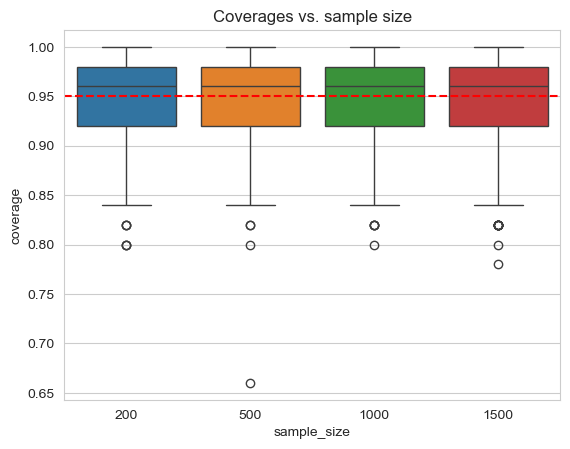

In [30]:
sns.set_style("whitegrid")

plt.figure()
sns.boxplot(data=coverage_df, x='sample_size', y='coverage', hue='sample_size', palette=sns.color_palette())
plt.axhline(y=1-sign_level, color='red', linestyle='dashed')
plt.legend().remove()
plt.title('Coverages vs. sample size')
plt.show()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\J2404\AppData\Local\Temp\ipykernel_26388\2189548975.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=coverage_df, x='sigma', y='coverage', hue='sample_size', palette=sns.color_palette())
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


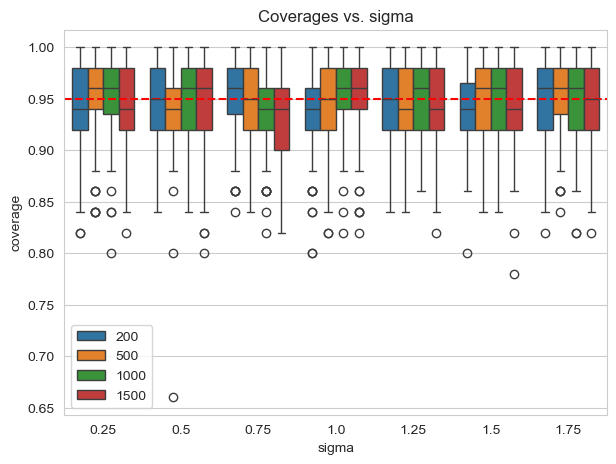

In [31]:
plt.figure(figsize=(7,5))
sns.boxplot(data=coverage_df, x='sigma', y='coverage', hue='sample_size', palette=sns.color_palette())
plt.title('Coverages vs. sigma')
plt.axhline(y=1-sign_level, color='red', linestyle='dashed')
plt.legend()#.remove()
plt.show()

INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\J2404\AppData\Local\Temp\ipykernel_26388\1853839560.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=coverage_df, x='sigma', y='OOB_quantile', hue='sample_size', palette=sns.color_palette())
INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


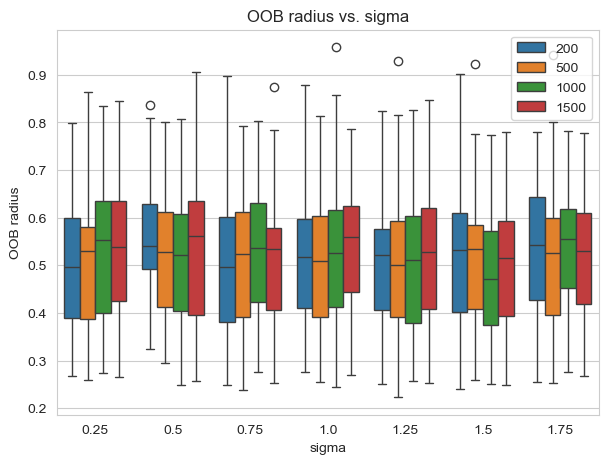

In [32]:
plt.figure(figsize=(7,5))
sns.boxplot(data=coverage_df, x='sigma', y='OOB_quantile', hue='sample_size', palette=sns.color_palette())
plt.title('OOB radius vs. sigma')
plt.ylabel('OOB radius')
plt.legend()#.remove()
plt.show()

In [38]:
results[57]['train_indices'].shape

(150,)